# Introdução
Para este trabalho, veremos alguns casos de limiarização global e local em imagens monocromáticas. Limiarização nada mais é do que o processo que diferencia os níveis de cinza de uma imagem atribuindo um valor fixo ao pixel.


## Ferramentas Utilizadas

As bibliotecas utilizadas são as seguintes:



*   **Numpy**
*   **OpenCV**
*   **Scikit Image**
*   **Matplotlib**
*   **Requests**

## Criação de funções e visualizações dos resultados

In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

In [2]:
def mostrar_hist(img):
  plt.hist(img.flatten(), 255, [0, 255], density = True)

In [3]:
def otsu(original):
  img = original.copy()

  hist, bin_edges = np.histogram(original, bins=256)
  bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.

  weight1 = np.cumsum(hist)
  weight2 = np.cumsum(hist[::-1])[::-1]

  mean1 = np.cumsum(hist * bin_mids) / weight1
  mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]

  inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
  index_of_max_val = np.argmax(inter_class_variance)

  threshold = bin_mids[:-1][index_of_max_val]

  img[img > threshold] = 255
  img[img <= threshold] = 0

  return img

In [4]:
def bernsen(original, size_neighbor):
  img = original.copy()

  n = size_neighbor

  for i in range(n, img.shape[0] - n):
    for j in range(n, img.shape[1] - n):
        neighbor = original[i - n : i + n, j - n : j + n]

        threshold = (int(neighbor.min()) + int(neighbor.max())) / 2

        img[i, j] = 255 if original[i, j] > threshold else 0

  return img

In [5]:
def niblack(original, size_neighbor, k):
  img = original.copy()

  n = size_neighbor

  for i in range(n, img.shape[0] - n):
    for j in range(n, img.shape[1] - n):
        neighbor = original[i - n : i + n, j - n : j + n]

        threshold = np.mean(neighbor) + k * np.std(neighbor)

        img[i, j] = 255 if original[i, j] > threshold else 0

  return img

In [6]:
def sauvola_pietaksinen(original, size_neighbor, k, R):
  img = original.copy()

  n = size_neighbor

  for i in range(n, img.shape[0] - n):
    for j in range(n, img.shape[1] - n):
        neighbor = original[i - n: i + n, j - n: j + n]

        threshold = np.mean(neighbor) * (1 + k * ((np.std(neighbor) / R) - 1))

        img[i, j] = 255 if original[i, j] > threshold else 0

  return img


In [7]:
def phansalskar_more_sabale(original, size_neighbor, k, R, p, q):
  img = original.copy()

  n = size_neighbor

  for i in range(n, img.shape[0] - n):
    for j in range(n, img.shape[1] - n):
        neighbor = original[i - n: i + n, j - n: j + n]

        threshold = np.mean(neighbor) * (1 + p * np.exp(-1 * q *
                                                        np.mean(neighbor)) + k * ((np.std(neighbor) / R) - 1))

        img[i, j] = 255 if original[i, j] > threshold else 0

  return img


In [8]:
def contraste(original, size_neighbor):
  img = original.copy()

  n = size_neighbor

  for i in range(n, img.shape[0] - n):
    for j in range(n, img.shape[1] - n):
        neighbor = original[i - n: i + n, j - n: j + n]

        if (original[i, j] - int(neighbor.min()) < int(neighbor.max()) - original[i, j]):
          img[i, j] = 0
        else:
          img[i, j] = 255

  return img


In [9]:
def media(original, size_neighbor):
  img = original.copy()

  n = size_neighbor

  for i in range(n, img.shape[0] - n):
    for j in range(n, img.shape[1] - n):
        neighbor = original[i - n: i + n, j - n: j + n]

        threshold = np.mean(neighbor)

        img[i, j] = 255 if original[i, j] > threshold else 0

  return img


In [10]:
def mediana(original, size_neighbor):
  img = original.copy()

  n = size_neighbor

  for i in range(n, img.shape[0] - n):
    for j in range(n, img.shape[1] - n):
        neighbor = original[i - n: i + n, j - n: j + n]

        threshold = np.median(neighbor)

        img[i, j] = 255 if original[i, j] > threshold else 0

  return img


## Entradas
As entradas padrões para este trabalho serão as imagens disponibilizadas no site do professor Hélio Pedrini, sendo elas, fiducial.pgm e monarch.pgm.

In [11]:
fiducial_request = requests.get('https://www.ic.unicamp.br/~helio/imagens_pgm/fiducial.pgm')
monarch_request = requests.get('https://www.ic.unicamp.br/~helio/imagens_pgm/monarch.pgm')

with open('fiducial.pgm', 'wb') as file:
  file.write(fiducial_request.content)

with open('monarch.pgm', 'wb') as file:
  file.write(monarch_request.content)

fiducial = cv2.imread('fiducial.pgm', -1) 
monarch = cv2.imread('monarch.pgm', -1) 

### Imagens originais e seus Histogramas

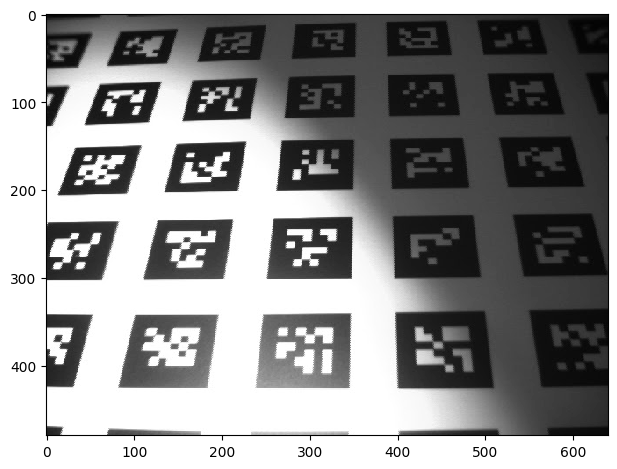

In [12]:
io.imshow(fiducial)

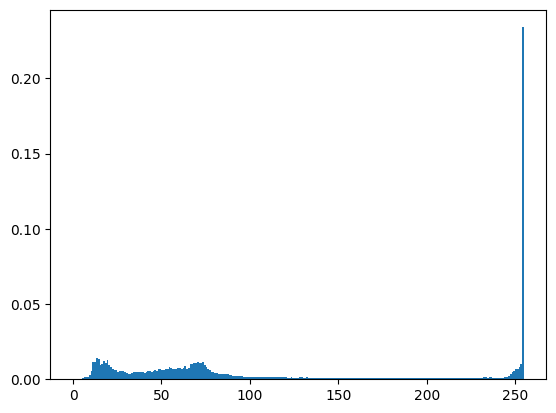

In [13]:
mostrar_hist(fiducial)

In [14]:
#Fração de pixels pretos em fiducial
print(f"{(np.sum(fiducial == 0) / (fiducial.shape[0]*fiducial.shape[1])) / 100}%")

0.0%


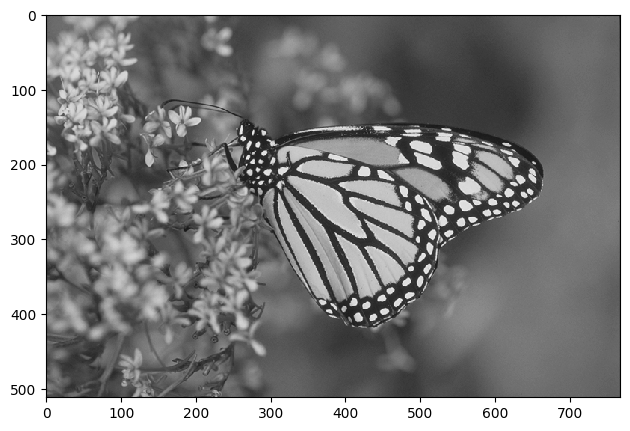

In [15]:
io.imshow(monarch)

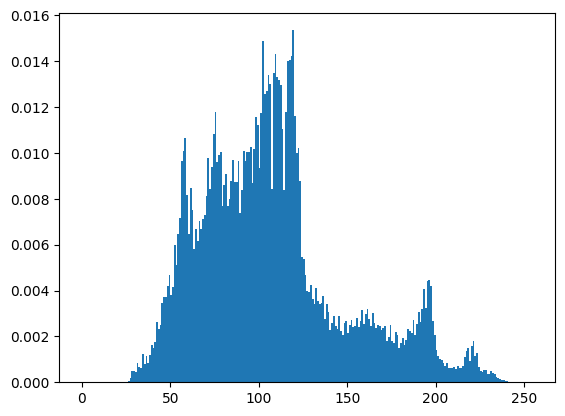

In [16]:
mostrar_hist(monarch)

In [17]:
#Fração de pixels pretos em monarch
print(f"{(np.sum(monarch == 0) / (monarch.shape[0]*monarch.shape[1])) / 100}%")

0.0%


# Método Global

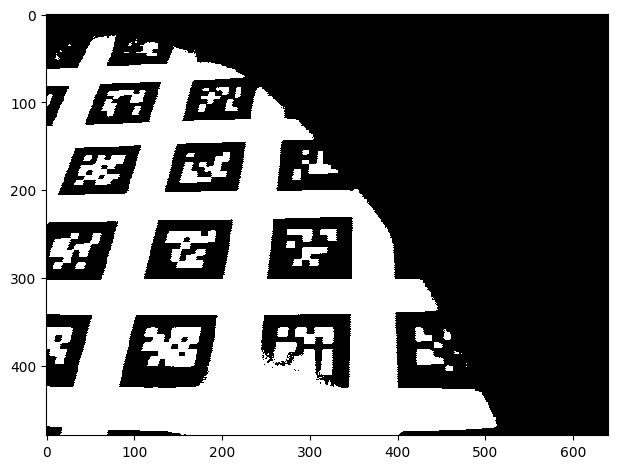

In [18]:
fiducial_global = fiducial.copy()

fiducial_global[fiducial_global > 128] = 255
fiducial_global[fiducial_global <= 128] = 0

io.imshow(fiducial_global)

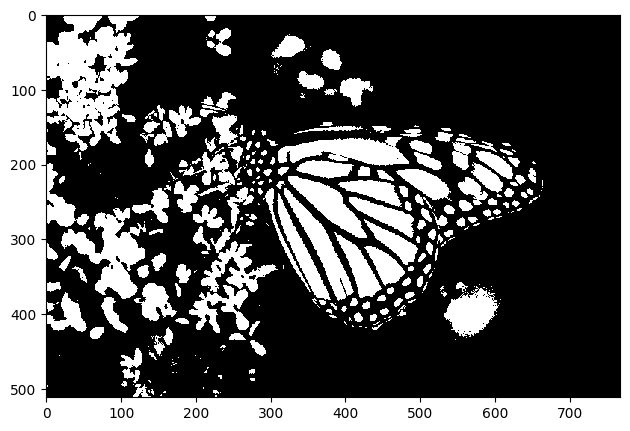

In [19]:
monarch_global = monarch.copy()

monarch_global[monarch_global > 128] = 255
monarch_global[monarch_global <= 128] = 0

io.imshow(monarch_global)

### Discussão dos Resultados
Para o método global, a aplicação da limiarização é bem direta e preserva de certa forma as formas maiores, mas verificamos que detalhes locais se perdem (justamente por não levar isso em consideração). Limiar utilizado: 128.

# Método de Otsu

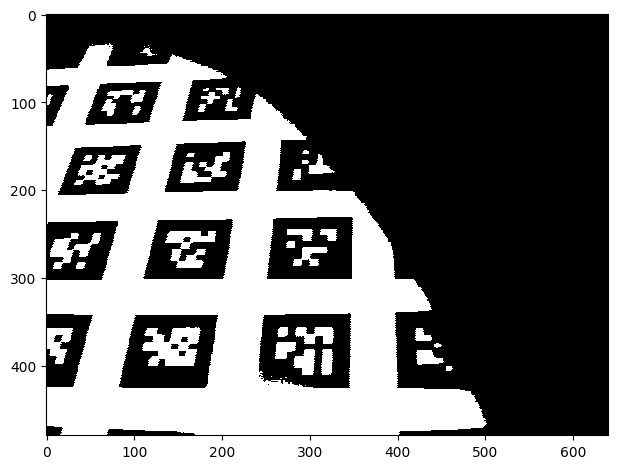

In [20]:
io.imshow(otsu(fiducial))

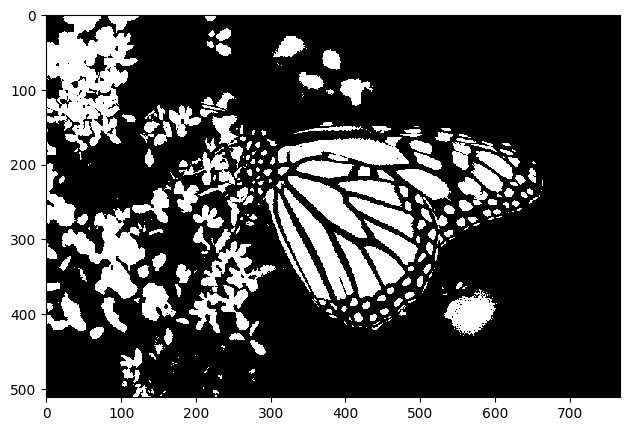

In [21]:
io.imshow(otsu(monarch))

### Discussão dos Resultados
Para o método de Otsu, o valor do limite é determinado automaticamente. Uma imagem bimodal é considerada. A ideia é dividir a imagem em duas classes de pixels de maneira a minimizar a variância intraclasse.

# Método de Bernsen

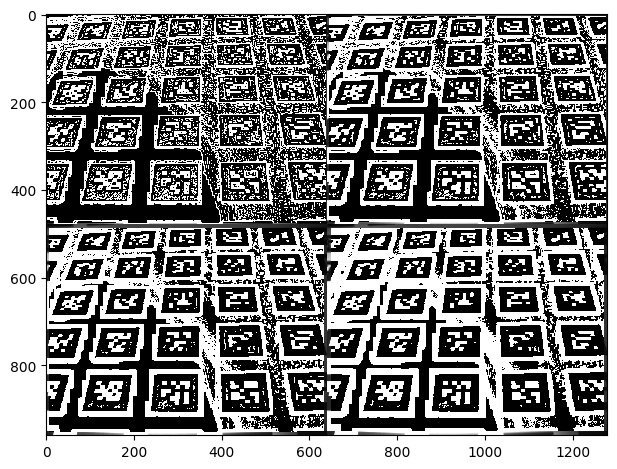

In [22]:
f_bernsen1 = bernsen(fiducial, 3)
f_bernsen2 = bernsen(fiducial, 5)
f_bernsen3 = bernsen(fiducial, 7)
f_bernsen4 = bernsen(fiducial, 9)


line1 = np.concatenate((f_bernsen1, f_bernsen2), axis=1)
line2 = np.concatenate((f_bernsen3, f_bernsen4), axis=1)

final = np.concatenate((line1, line2), axis=0)


io.imshow(final)

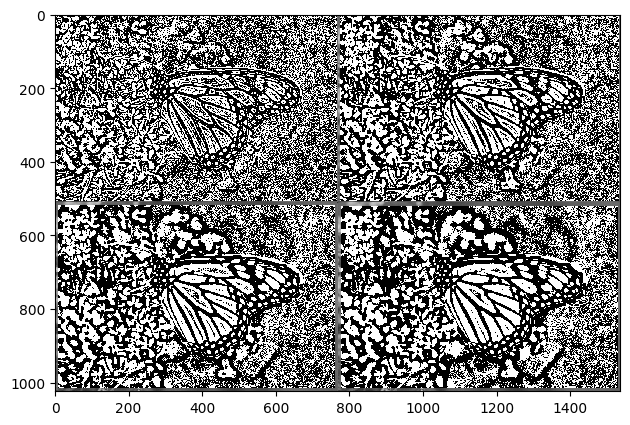

In [23]:
m_bernsen1 = bernsen(monarch, 3)
m_bernsen2 = bernsen(monarch, 5)
m_bernsen3 = bernsen(monarch, 7)
m_bernsen4 = bernsen(monarch, 9)


line1 = np.concatenate((m_bernsen1, m_bernsen2), axis=1)
line2 = np.concatenate((m_bernsen3, m_bernsen4), axis=1)

final = np.concatenate((line1, line2), axis=0)


io.imshow(final)

### Discussão dos Resultados
Para o método de Bernsen verificamos que o tamanho da vizinhança influencia bastante no resultado final. Percebemos que utilizando uma vizinhança 9x9 as formas acabam perdendo detalhes sobressaltando formas do todo (como o corpo da monarch), mas com vizinhaça menores, as bordas mais detalhosas permanecem de certa maneira.

# Método de Niblack

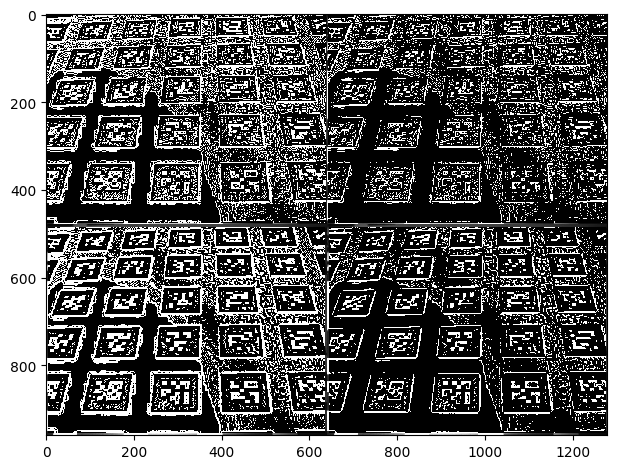

In [24]:
f_niblack1 = niblack(fiducial, 3, 0.25)
f_niblack2 = niblack(fiducial, 3, 0.5)
f_niblack3 = niblack(fiducial, 5, 0.25)
f_niblack4 = niblack(fiducial, 5, 0.5)

line1 = np.concatenate((f_niblack1, f_niblack2), axis=1)
line2 = np.concatenate((f_niblack3, f_niblack4), axis=1)

final = np.concatenate((line1, line2), axis=0)

io.imshow(final)

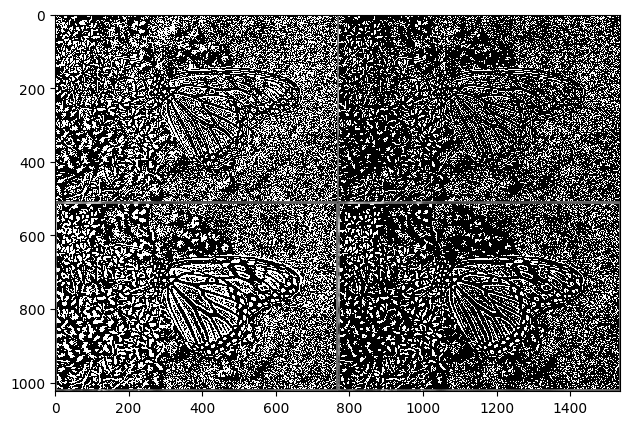

In [25]:
m_niblack1 = niblack(monarch, 3, 0.25)
m_niblack2 = niblack(monarch, 3, 0.5)
m_niblack3 = niblack(monarch, 5, 0.25)
m_niblack4 = niblack(monarch, 5, 0.5)

line1 = np.concatenate((m_niblack1, m_niblack2), axis=1)
line2 = np.concatenate((m_niblack3, m_niblack4), axis=1)

final = np.concatenate((line1, line2), axis=0)

io.imshow(final)

### Discussão dos Resultados
Para o método de Niblack, percebemos que a vizinhça 5x5 ressalta os detalhes, enquanto que o aumento de k, acaba trazendo mais pixels pretos, ou seja, mais partes da imagem são classificadas como parte do objeto.

# Método de Sauvola e Pietaksien

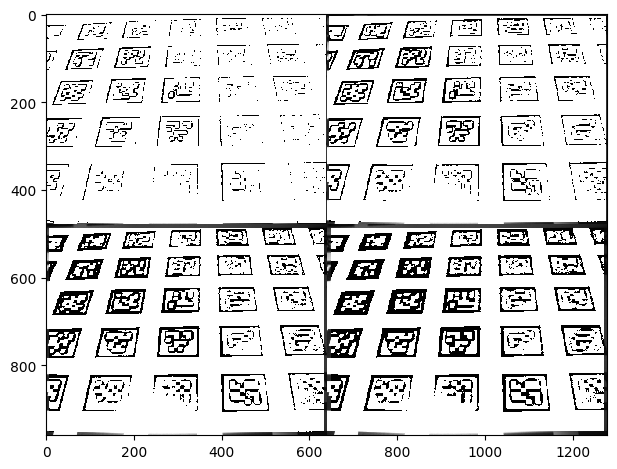

In [26]:
f_sauvola1 = sauvola_pietaksinen(fiducial, 3, 0.5, 128)
f_sauvola2 = sauvola_pietaksinen(fiducial, 5, 0.5, 128)
f_sauvola3 = sauvola_pietaksinen(fiducial, 7, 0.5, 128)
f_sauvola4 = sauvola_pietaksinen(fiducial, 9, 0.5, 128)

line1 = np.concatenate((f_sauvola1, f_sauvola2), axis=1)
line2 = np.concatenate((f_sauvola3, f_sauvola4), axis=1)

final = np.concatenate((line1, line2), axis=0)

io.imshow(final)

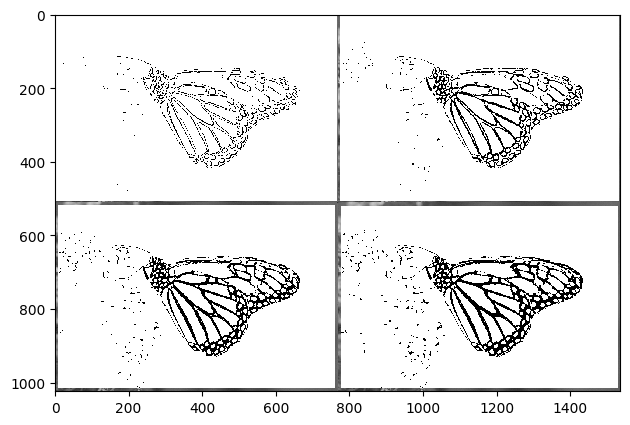

In [27]:
m_sauvola1 = sauvola_pietaksinen(monarch, 3, 0.5, 128)
m_sauvola2 = sauvola_pietaksinen(monarch, 5, 0.5, 128)
m_sauvola3 = sauvola_pietaksinen(monarch, 7, 0.5, 128)
m_sauvola4 = sauvola_pietaksinen(monarch, 9, 0.5, 128)

line1 = np.concatenate((m_sauvola1, m_sauvola2), axis=1)
line2 = np.concatenate((m_sauvola3, m_sauvola4), axis=1)

final = np.concatenate((line1, line2), axis=0)

io.imshow(final)

### Discussão dos Resultados
Para o método de Sauvola e Pietaksinen, utilizamos os parâmetros de k e R sugeridos pelos autores (k = 0.5 e R = 128), mas ainda continuamos com a estratégia de verificar o que acontece com a imagem dependendo do tamanho da vizinhança. Neste caso verificamos que o tamanho da vizinhnça 9x9, para a monarch, destaca-se muito o objeto, havendo até mesmo o início de um espaço entra asas e o que vem depois.

# Método de Phansalskar, More e Sabale

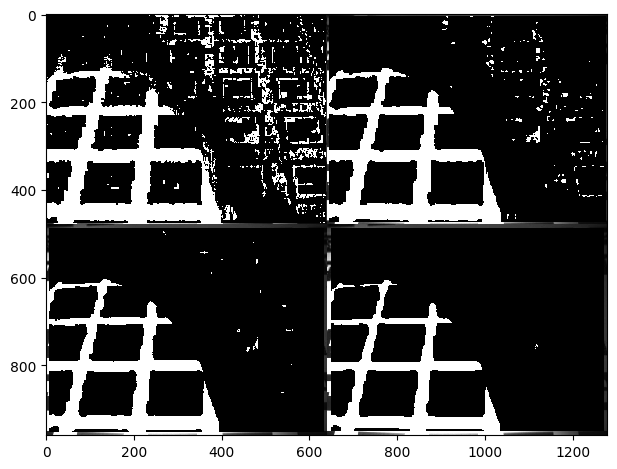

In [28]:
f_phansalskar1 = phansalskar_more_sabale(fiducial, 3, 0.25, 0.5, 2, 10)
f_phansalskar2 = phansalskar_more_sabale(fiducial, 5, 0.25, 0.5, 2, 10)
f_phansalskar3 = phansalskar_more_sabale(fiducial, 7, 0.25, 0.5, 2, 10)
f_phansalskar4 = phansalskar_more_sabale(fiducial, 9, 0.25, 0.5, 2, 10)

line1 = np.concatenate((f_phansalskar1, f_phansalskar2), axis=1)
line2 = np.concatenate((f_phansalskar3, f_phansalskar4), axis=1)

final = np.concatenate((line1, line2), axis=0)

io.imshow(final)

### Discussão dos Resultados
Para o método de Phansalskar, More e Sabale, utilizamos os parâmetros de k, R, p e q sugeridos pelos autores (k = 0.5, R = 128, p = 2 e q = 10). Verificamos que o tamanho da vizinhança destaca alguns detalhes, mas depois perdemos muito a qualidade da segmentação. Para termos resultados melhores, poderíamos alterar os parâmetros até chegar em um nível bom de limiarização.

# Método do Contraste

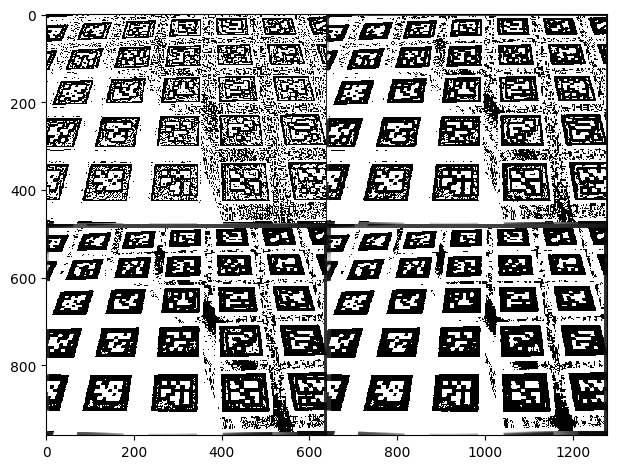

In [29]:
f_constraste1 = contraste(fiducial, 3)
f_constraste2 = contraste(fiducial, 5)
f_constraste3 = contraste(fiducial, 7)
f_constraste4 = contraste(fiducial, 9)

line1 = np.concatenate((f_constraste1, f_constraste2), axis=1)
line2 = np.concatenate((f_constraste3, f_constraste4), axis=1)

final = np.concatenate((line1, line2), axis=0)

io.imshow(final)

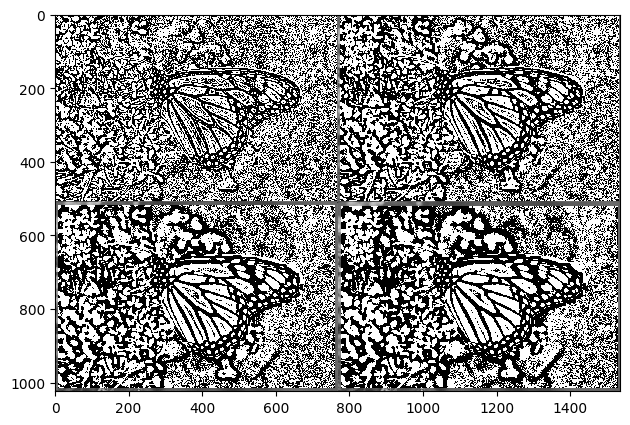

In [30]:
m_constraste1 = contraste(monarch, 3)
m_constraste2 = contraste(monarch, 5)
m_constraste3 = contraste(monarch, 7)
m_constraste4 = contraste(monarch, 9)

line1 = np.concatenate((m_constraste1, m_constraste2), axis=1)
line2 = np.concatenate((m_constraste3, m_constraste4), axis=1)

final = np.concatenate((line1, line2), axis=0)

io.imshow(final)

### Discussão dos Resultados
Para o método de Contraste o resultado acaba sendo bem diferente do que visto até agora. Ao invés de termos mais detalhes com o aumento da vizinhança, eles diminuiem. Isso se deve justamente por conta do aumento dos valores dos pixels, fazendo com que esse range aumente, logo, os máximos e mínimos variam bastante.

# Método da Média

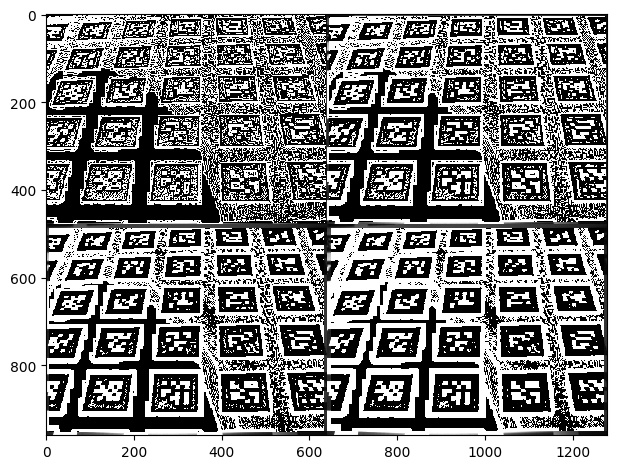

In [31]:
f_media1 = media(fiducial, 3)
f_media2 = media(fiducial, 5)
f_media3 = media(fiducial, 7)
f_media4 = media(fiducial, 9)

line1 = np.concatenate((f_media1, f_media2), axis=1)
line2 = np.concatenate((f_media3, f_media4), axis=1)

final = np.concatenate((line1, line2), axis=0)

io.imshow(final)

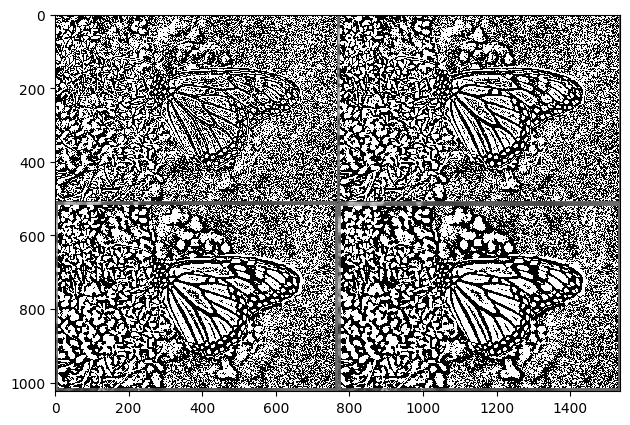

In [32]:
m_media1 = media(monarch, 3)
m_media2 = media(monarch, 5)
m_media3 = media(monarch, 7)
m_media4 = media(monarch, 9)

line1 = np.concatenate((m_media1, m_media2), axis=1)
line2 = np.concatenate((m_media3, m_media4), axis=1)

final = np.concatenate((line1, line2), axis=0)

io.imshow(final)

### Discussão dos Resultados
Para o método da Média, acredito que seja até óbvio saber que com o aumento da vizinhança os detalhes também ficam mais aparentes, por se tratar de uma medida de tendência central.

# Método da Mediana

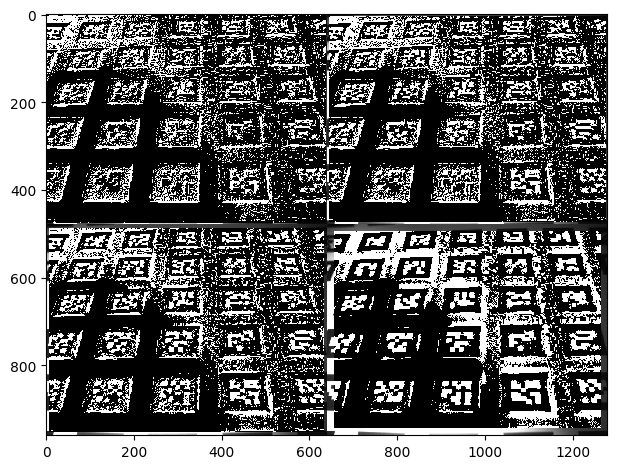

In [33]:
f_mediana1 = mediana(fiducial, 3)
f_mediana2 = mediana(fiducial, 5)
f_mediana3 = mediana(fiducial, 7)
f_mediana4 = mediana(fiducial, 15)

line1 = np.concatenate((f_mediana1, f_mediana2), axis=1)
line2 = np.concatenate((f_mediana3, f_mediana4), axis=1)

final = np.concatenate((line1, line2), axis=0)

io.imshow(final)

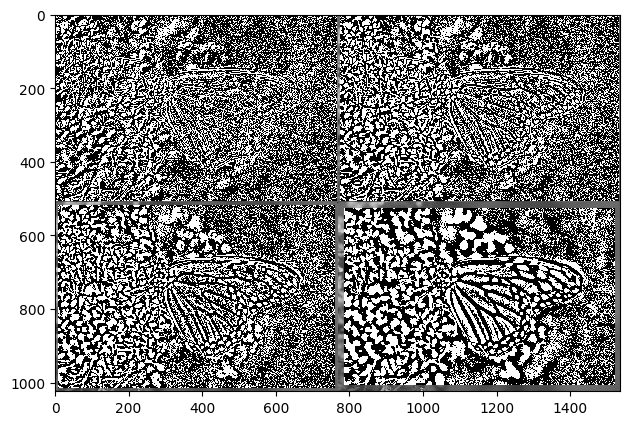

In [34]:
m_mediana1 = mediana(monarch, 3)
m_mediana2 = mediana(monarch, 5)
m_mediana3 = mediana(monarch, 7)
m_mediana4 = mediana(monarch, 15)

line1 = np.concatenate((m_mediana1, m_mediana2), axis=1)
line2 = np.concatenate((m_mediana3, m_mediana4), axis=1)

final = np.concatenate((line1, line2), axis=0)

io.imshow(final)

### Discussão dos Resultados
Para o método da Mediana, percebemos que com o aumento da vizinhança os detalhes também ficam mais aparentes, por se tratar de uma medida de tendência central. No entanto, os detalhes demoram a aparecer, vide a pouca diferença entre usar vizinhança 3x3 e 5x5.